In [22]:
import torch
import numpy as np
from torchvision import io
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [16]:
class mnist_dataset(Dataset):
    def __init__(self, root_dir, train=True, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.labels = []
        
        folder = 'train' if train else 'test'
        folder_path = os.path.join(root_dir, folder)
        
        for label in os.listdir(folder_path):
            label_path = os.path.join(folder_path, label)
            
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                self.data.append(img_path)
                self.labels.append(int(label))
                
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_path = self.data[index]
        label = self.labels[index]
        img = io.read_image(img_path)
        
        if self.transform:
            img = self.transform(img)
            
        return img, label

In [17]:
train_dataset = mnist_dataset(root_dir='mnist')

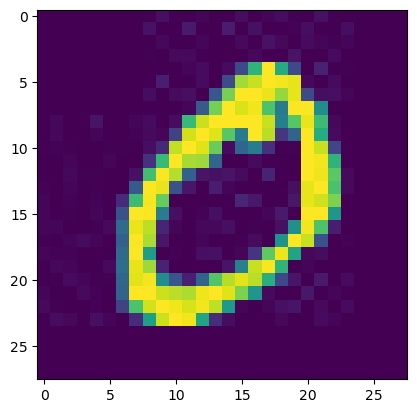

In [21]:
img, label = train_dataset[0]
plt.imshow(img[0, :, :])

In [25]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
train_images, train_labels = next(iter(train_loader))

Text(0.5, 1.0, 'tensor(5)')

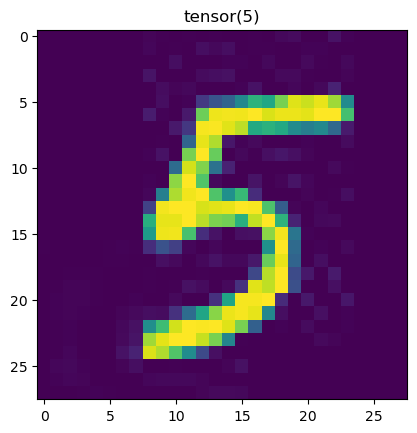

In [30]:
plt.imshow(train_images[20].squeeze())
plt.title(train_labels[20])